### Yığın (Stack) nedir?

Yığın, verileri belirli bir şekilde depolamak için tasarlanmış bir veri yapısıdır. Bir madeni para yığını hayal edin: Bir madeni parayı yalnızca yığının en üstüne yerleştirebilirsiniz ve bir madeni parayı yalnızca üst kısımdan çıkarabilirsiniz. Alttaki paraya erişmek için öncelikle üstündeki tüm paraları kaldırmanız gerekir.

BT terminolojisinde yığın, Son Giren İlk Çıkar anlamına gelen LIFO olarak da bilinir. Bu, en son eklenen öğenin ilk kaldırılacak öğe olduğu anlamına gelir.

Bir yığın iki temel işlemi destekler:
- **Push**: Yığının en üstüne yeni bir öğe ekleme.
- **Pop**: Üstteki öğe yığından kaldırılıyor.

Yığınlar birçok klasik algoritmada sıklıkla kullanılır ve çeşitli araçların uygulanmasında gereklidir.

### Yığın Kavramı

Hem prosedür hem de nesne yönelimli yaklaşımları kullanarak Python'da basit bir yığın uygulayalım. Prosedürel yaklaşımla başlayacağız.

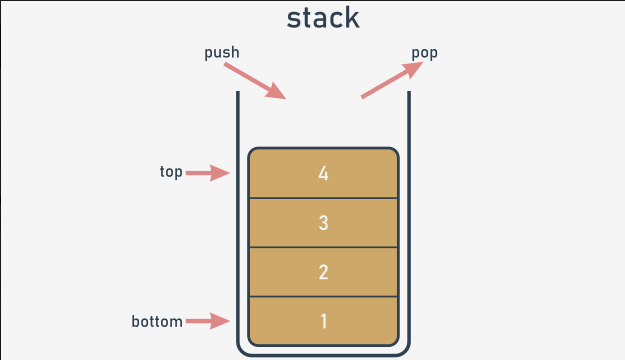

### Yığın - Prosedürel Yaklaşım

Öncelikle stack'e eklenecek değerlerin nasıl saklanacağına karar verin. En basit yöntem bir liste kullanmaktır. Yığının boyut sınırı olmadığını ve yığının en üst öğesinin listenin son öğesi olduğunu varsayacağız.

Yığını oluşturmak için şunu kullanın:

In [1]:
stack = []

Şimdi yığına değer ekleyecek bir fonksiyon tanımlayalım:

- Fonksiyonun adı 'Push'.
- Bir parametre (yığına eklenecek değer) alır.
- Hiçbir şey döndürmez.
- Parametrenin değerini yığının sonuna ekler.

İşte uygulama:

In [2]:
def push(val):
    stack.append(val)


Next, we'll define a function to remove a value from the stack:

- The function is named `pop`.
- It takes no parameters.
- It returns the value removed from the stack.
- It reads and removes the value from the top of the stack.

Here's the implementation:


In [3]:
def pop():
    val = stack[-1]
    del stack[-1]
    return val


**Not:** İşlev, yığının boş olup olmadığını kontrol etmez.

Son olarak, yığının nasıl çalıştığını göstermek için her şeyi birleştirelim. Programın tamamı yığına üç sayıyı iter, onları çıkarır ve değerlerini yazdırır:

In [4]:
stack = []

def push(val):
    stack.append(val)

def pop():
    val = stack[-1]
    del stack[-1]
    return val

# Example usage:
push(1)
push(2)
push(3)

print(pop())
print(pop())
print(pop())


3
2
1


### Yığın: Prosedürel Yaklaşım vs. Nesne Yönelimli Yaklaşım

Prosedürel yığın artık hazır. Bazı zayıf yönler ve geliştirme alanları (örneğin hata işleme için istisnaların kullanılması) olsa da, yığın tamamen uygulanmış durumda ve gerektiğinde kullanılabilir.

Ancak, yığını ne kadar çok kullanırsanız, o kadar çok dezavantajını fark edeceksiniz:

1. **Güvenlik Açığı**: Yığın listesi oldukça savunmasızdır. Herhangi biri istemeden onu değiştirebilir ve bu da yığını bozabilir. Örneğin, aşağıdaki gibi basit bir hata sorunlara yol açabilir:
    ```python
    stack[0] = 0
    ```

2. **Birden Fazla Yığın**: Birden fazla yığına ihtiyacınız varsa, her biri için ek listeler ve karşılık gelen push ve pop fonksiyonları oluşturmanız gerekecektir.

3. **Ek Fonksiyonlar**: Yığın için ek işlevler gerekirse, bunları ayrı ayrı uygulamanız gerekecektir ki bu, birden fazla yığınınız varsa zahmetli hale gelebilir.

Nesne yönelimli yaklaşım bu sorunları şu şekilde çözer:

1. **Kapsülleme**: Bu, belirli değerleri yetkisiz erişimden gizlemenize ve korumanıza olanak tanır, böylece bu değerler yalnızca kontrol edilen yollarla değiştirilebilir.

2. **Birden Fazla Örnek**: Yığın davranışlarını uygulayan bir sınıf ile, kodu kopyalamadan ihtiyacınız kadar yığın örneği oluşturabilirsiniz.

3. **Kalıtım**: Üst sınıftan mevcut özellikleri devralan ve yeni özellikler ekleyen bir alt sınıf oluşturarak yığının işlevselliğini genişletebilirsiniz.

### Yığını Uygulama: Prosedürel vs. Nesne Yönelimli Yaklaşım

Şimdi, sizi adım adım nesne yönelimli programlama dünyasına yönlendirerek nesne yönelimli yaklaşımı kullanarak yeni bir yığın uygulaması yapalım.

### Yığın - Nesneye Dayalı Yaklaşım

Ana fikir aynı: yığının elemanlarını saklamak için bir liste kullanacağız. Buradaki zorluk bu listeyi bir sınıf içinde kapsüllemektir.

Sıfırdan başlayalım. Yığın sınıfını şu şekilde tanımlayabilirsiniz:

```python
class Stack:
    pass
```

Bu sınıftan iki şey bekliyoruz:

1. **Depolama Özelliği**: Sınıfın, yığının öğelerini saklayacak bir listesi olmalıdır. Sınıfın her nesnesinin kendi listesi olmalıdır; liste farklı yığın örnekleri arasında paylaşılmamalıdır.
2. **Kapsülleme**: Liste, sınıfın kullanıcılarından gizlenmelidir.

Python'da diğer programlama dillerinde olduğu gibi böyle bir özelliği doğrudan bildiremezsiniz. Bunun yerine, özellikleri sınıfa manuel olarak eklemek için belirli bir ifade veya talimat eklemeniz gerekir.

Her yeni yığın nesnesi başlatıldığında listenin oluşturulduğundan emin olmak için yapıcı olarak bilinen özel bir işlevi kullanmamız gerekir. Yapıcının ikili bir amacı vardır:

1. Belirli bir şekilde adlandırılmalıdır.
2. Yeni bir nesne oluşturulduğunda otomatik olarak çağrılır.

Yapıcının görevi, gerekli tüm özellikleri başlatarak yeni nesneyi kurmaktır.

Sınıfa basit bir kurucunun nasıl ekleneceği aşağıda açıklanmıştır:

In [5]:
class Stack:  # Defining the Stack class.
    def __init__(self):  # Defining the constructor function.
        print("Hi!")


stack_object = Stack()  # Instantiating the object.

Hi!


Birkaç önemli nokta:

- Yapıcı her zaman `__init__` olarak adlandırılır.
- Genellikle "self" olarak adlandırılan en az bir parametreye sahip olmalıdır. Bu parametre, oluşturulan yeni nesneyi temsil eder ve onu değiştirmenize ve gerekli özellikleri eklemenize olanak tanır.

Yukarıdaki kodu çalıştırmak çıktıyı verecektir:


```
Hi!
```

Kodda yapıcıya açık bir çağrı yapılmadığına dikkat edin; otomatik olarak çağrılır. Şimdi bu bilgiyi yığın uygulamamızı daha da geliştirmek için kullanalım.

### Yığın – Nesneye Dayalı Yaklaşım: Devamı

Yapıcı içinde yapılan ve 'self' parametresinin durumunu değiştiren herhangi bir değişiklik, yeni oluşturulan nesneye yansıtılacaktır.

Bu, nesneye özellikler ekleyebileceğiniz anlamına gelir ve bu özellikler, nesne yok edilene veya özellik açıkça kaldırılana kadar kalacaktır.

Yeni nesneye bir özellik ekleyelim: yığın görevi görecek bir liste. Buna 'stack_list' adını vereceğiz.

Bunu nasıl yapacağınız aşağıda açıklanmıştır:

In [6]:
class Stack:
    def __init__(self):
        self.stack_list = []


stack_object = Stack()
print(len(stack_object.stack_list))

0


**Notlar:**

- Çağırma yöntemlerine benzer şekilde nokta gösterimi kullanıyoruz. Bu, bir nesnenin özelliklerine erişmenin standart yoludur: nesneyi adlandırın, bir nokta (.) ekleyin ve özelliğin adını belirtin. Bir özelliğe erişirken, bir yöntemi çağırmadığınız için parantez kullanmayın.
- Bir özelliğin değerini ilk kez ayarladığınızda (yapıcıda olduğu gibi), özelliği yaratırsınız. Bu noktadan itibaren nesnenin özelliği vardır ve değerini kullanabilir.
- Kodda, yığının mevcut uzunluğunu kontrol etmek için nesneyi oluşturduktan hemen sonra `stack_list` özelliğine sınıf dışından da eriştik.

Bu, yığının başlangıçta boş olduğunu gösterir. Ancak biz 'stack_list'in dış dünyadan gizlenmesini istiyoruz. Mümkün mü?

Evet, çok sezgisel olmasa da mümkün ve basittir.

### Yığın – Nesneye Dayalı Yaklaşım: Devamı

Şu değişikliğe bir göz atın: : `stack_list`en önce iki alt çizgi ekledik; başka bir şey yok:

In [7]:
class Stack:
    def __init__(self):
        self.__stack_list = []


stack_object = Stack()
print(len(stack_object.__stack_list))

AttributeError: 'Stack' object has no attribute '__stack_list'

Bu değişiklik programı geçersiz kılar.

**Neden?**

Herhangi bir sınıf bileşeninin adı iki alt çizgiyle (__) başlarsa, özel olur. Bu, yalnızca sınıf içinden erişilebileceği anlamına gelir.

Ona dış dünyadan erişemezsiniz. Python kapsülleme kavramını bu şekilde uygular.

Bu varsayımı sınamak için programı çalıştırın; bir 'AttributeError' istisnası ortaya çıkmalıdır.

Bu, `__stack_list`in gerçekten özel olduğunu ve sınıf dışından doğrudan erişilemeyeceğini doğrular. Bu Python'un kapsülleme yaklaşımının temel bir parçasıdır.

### Nesneye Dayalı Yaklaşım: Sıfırdan Yığın Oluşturmak

Artık yığın sınıfımız için 'Push' ve 'pop' yöntemlerini uygulama zamanı. Python'da bu tür yöntemler (sınıf etkinlikleri), tıpkı yapıcı gibi, sınıf gövdesi içinde tanımlanmalıdır.

Bu yöntemlerin, gizli olan listeden farklı olarak, sınıfın kullanıcıları tarafından erişilebilir olmasını istiyoruz. Bu nedenle bu yöntemler herkese açık olmalı, yani adları iki veya daha fazla alt çizgiyle başlamamalıdır. Ayrıca, yöntem adlarının sonunda birden fazla alt çizgi bulunmamalıdır.

İşte yığın sınıfının `push` ve `pop` yöntemleriyle uygulanması:

In [ ]:
class Stack:
    def __init__(self):
        self.__stack_list = []


    def push(self, val):
        self.__stack_list.append(val)


    def pop(self):
        val = self.__stack_list[-1]
        del self.__stack_list[-1]
        return val


stack_object = Stack()

stack_object.push(3)
stack_object.push(2)
stack_object.push(1)

print(stack_object.pop())
print(stack_object.pop())
print(stack_object.pop())


#### Açıklama

- **Genel Yöntemler**: `push` ve `pop` genel yöntemlerdir, yani isimleri alt çizgi ile başlamaz. Bu, onların sınıf kullanıcıları tarafından erişilebilir olmasını sağlar.
- **Self Parametresi**: Her iki yöntemde de `self` ilk parametre olarak yer alır. Bu gereklidir çünkü `self`, yöntemlerin ait oldukları örneğin özelliklerine ve diğer yöntemlerine erişmesini sağlar. Bir yöntem çağrıldığında, Python otomatik olarak mevcut örneği ilk argüman olarak iletir.
- **Özel Özelliklere Erişim**: Yöntemler, özel `__stack_list` özelliğine `self.__stack_list` kullanarak erişir. Bu desen (`self.property_name`), yöntemlerin nesnenin özelliklerini değiştirmesine olanak tanır.

### Özet

- **Sınıf Tanımı**: Yığın sınıfı, özel `__stack_list` özelliğini başlatan bir yapıcı ile tanımlanmıştır.
- **Push Yöntemi**: Yığına bir değer ekler.
- **Pop Yöntemi**: Yığının en üstündeki değeri çıkarır ve döner.
- **Kapsülleme**: `__stack_list` özelliği özeldir, bu da yalnızca `push` ve `pop` yöntemleri aracılığıyla değiştirilmesini sağlar ve kapsülleme sağlar.

Bu yapıyla, yığın sınıfımız artık tam işlevsel ve kullanıma hazırdır, kapsülleme ve yeniden kullanılabilirlik gibi nesne yönelimli yaklaşımın faydalarını gösterir.

### Nesne Yönelimli Yaklaşım: Baştan Bir Yığın Oluşturma

Böyle bir sınıfa sahip olmak, bazı yeni olanaklar açar. Örneğin, artık aynı şekilde davranan birden fazla yığına sahip olabilirsiniz. Her yığının kendi özel verileri olacak, ancak aynı yöntemler setini kullanacaktır.

Bu örnek için tam olarak istediğimiz budur.

Kodu analiz edin:

In [8]:
class Stack:
    def __init__(self):
        self.__stack_list = []

    def push(self, val):
        self.__stack_list.append(val)

    def pop(self):
        val = self.__stack_list[-1]
        del self.__stack_list[-1]
        return val


stack_object_1 = Stack()
stack_object_2 = Stack()

stack_object_1.push(3)
stack_object_2.push(stack_object_1.pop())

print(stack_object_2.pop())


3


Aynı taban sınıftan oluşturulmuş iki yığın vardır. Bağımsız olarak çalışırlar. İsterseniz daha fazlasını yapabilirsiniz.

### Nesne yaklaşımı: sıfırdan bir yığın (devamı)

Aşağıdaki parçayı analiz edin; `Stack` sınıfının üç nesnesini oluşturduk. Daha sonra bunları bir araya getirdik. Ekrana çıkan değeri tahmin etmeye çalışın.

In [9]:
class Stack:
    def __init__(self):
        self.__stack_list = []

    def push(self, val):
        self.__stack_list.append(val)

    def pop(self):
        val = self.__stack_list[-1]
        del self.__stack_list[-1]
        return val


little_stack = Stack()
another_stack = Stack()
funny_stack = Stack()

little_stack.push(1)
another_stack.push(little_stack.pop() + 1)
funny_stack.push(another_stack.pop() - 2)

print(funny_stack.pop())

0


### Nesneye Dayalı Yaklaşım: Sıfırdan Bir Yığın (Devam)

Şimdi yığınları işlemek için ek işlevlere sahip yeni bir sınıf oluşturarak yığınımızı geliştirelim. Özellikle, bu yeni sınıfın halihazırda yığında depolanan tüm öğelerin toplamını değerlendirebilmesini istiyoruz.

Mevcut `Stack` sınıfını değiştirmek istemiyoruz çünkü o zaten amaçlanan uygulamalar için işlevseldir. Bunun yerine yeni yeteneklere sahip bir alt sınıf oluşturacağız.

İlk adım basittir: 'Stack' sınıfından miras alan yeni bir alt sınıf tanımlayın.

İşte nasıl göründüğü:

In [10]:
class AddingStack(Stack):
    pass

Yeni sınıf henüz herhangi bir yeni bileşen tanımlamaz, ancak tüm bileşenleri kendi üst sınıfından ("Yığın") miras alır. Üst sınıfın adı, yeni sınıf adının ardından iki nokta üst üste işaretinden sonra gelir.

### Yeni Yığın için İstenilen İşlevsellik

1. **Gelişmiş İtme Yöntemi**: `Push` yöntemi, değeri yalnızca yığına değil aynı zamanda bir `sum' değişkenine de eklemelidir.
2. **Gelişmiş Pop Yöntemi**: `pop` yöntemi yalnızca değeri yığından kaldırmakla kalmamalı, aynı zamanda onu 'sum' değişkeninden de çıkarmalıdır.

### Toplam Değişkenini Ekleme

Toplamı saklamak için sınıfa yeni bir özel değişken ekleyeceğiz. Yığın listesi gibi, bu değişken de harici manipülasyonu önlemek için özel olmalıdır.

Bildiğiniz gibi Constructor üzerinden yeni özellikler ekleniyor. İşte bunu nasıl yapıyoruz:

In [11]:
class AddingStack(Stack):
    def __init__(self):
        Stack.__init__(self)
        self.__sum = 0

### Açıklama

- **Süper Sınıf Oluşturucusunu Çağırmak**: `Stack.__init__(self)' satırı açıkça üst sınıfın yapıcısını çağırır. Bu Python'da gereklidir çünkü '__stack_list'in düzgün şekilde başlatılmasını sağlar. Bu çağrı olmasaydı, yeni yığın nesnesinin '__stack_list' listesi eksik olurdu ve bu da onun arızalanmasına neden olurdu.

 Sözdizimi:
 - Üst sınıf adını belirtin ("Yığın").
 - Ondan sonra nokta (`.`) koyun.
 - Yapıcı adını belirtin (`__init__`).
 - Nesne örneğini ("self") yapıcıya argüman olarak iletin.

- **Sum Özelliğini Eklemek**: `self.__sum = 0`, yığındaki tüm değerlerin toplamını saklayacak toplam değişkenini başlatır.

### Önerilen Uygulama

Alt sınıfta herhangi bir başlatma işlemi gerçekleştirmeden önce genellikle üst sınıf yapıcısının çağrılması önerilir. Bu, alt sınıfa özgü özellikler veya yöntemler eklenmeden önce temel sınıfın doğru şekilde kurulmasını sağlar.

Geliştirilmiş "Push" ve "pop" yöntemleriyle güncellenmiş sınıf tanımı aşağıda verilmiştir:

In [12]:
class Stack:
    def __init__(self):
        self.__stack_list = []

    def push(self, val):
        self.__stack_list.append(val)

    def pop(self):
        val = self.__stack_list[-1]
        del self.__stack_list[-1]
        return val


class AddingStack(Stack):
    def __init__(self):
        Stack.__init__(self)
        self.__sum = 0

Bu, mevcut yapıcılardan herhangi birini açıkça çağırabileceğiniz tek zamandır ve bunun alt sınıfın yapıcısı içinde yapılması gerekir.

Sözdizimine dikkat edin:

- Üst sınıfın adını belirtin (kurucusunu çağırmak istediğiniz sınıf).
- Ondan sonra nokta (`.`) ekleyin.
- Yapıcının adını belirtin.
- Yapıcı tarafından başlatılacak nesneyi (sınıf örneği) iletin. Bu, argümanın belirtilmesini ve `self` değişkeninin kullanılmasını gerektirir. Not: Sınıfın dışından herhangi bir yöntemin (kurucular dahil) çağrılması, hiçbir zaman argüman listesine `self` argümanının eklenmesini gerektirmez. Bununla birlikte, sınıf içinden bir yöntemin çağrılması, listede ilk sıraya yerleştirilmesi gereken `self` argümanının açık bir şekilde kullanılmasını gerektirir.

**Not:** Alt sınıf içinde başka herhangi bir başlatma işlemi gerçekleştirmeden önce genellikle üst sınıfın yapıcısının çağrılması önerilir. Bu uygulama, kurulumun doğru yapılmasını sağlar ve verilen örnekte izlenen kuraldır.

### Nesne Yönelimli Yaklaşım: Baştan Bir Yığın Oluşturma (Devamı)

Şimdi iki yöntem ekleyelim. Ama gerçekten eklemek mi? Bu yöntemler zaten üst sınıfta var. Böyle bir şey yapabilir miyiz?

Evet, yapabiliriz. Bu, yöntemlerin adlarını değil işlevselliklerini değiştireceğimiz anlamına gelir. Daha kesin bir şekilde söylemek gerekirse, sınıfın arayüzü (nesnelerin nasıl kullanıldığı) aynı kalırken, uygulama aynı anda değişir.

Öncelikle `push` yönteminin uygulanmasına bakalım. Bu yöntemden beklediğimiz:

- Değeri `__sum` değişkenine eklemek;
- Değeri yığına itmek.

Not: İkinci işlem zaten üst sınıfta uygulanmıştır, bu yüzden onu kullanmalıyız, çünkü `__stack_list` değişkenine erişmenin başka bir yolu yoktur.

Alt sınıftaki `push` yöntemi şöyle görünür:

In [13]:
class AddingStack(Stack):
    def __init__(self):
        Stack.__init__(self)
        self.__sum = 0

    def push(self, val):
        self.__sum += val
        Stack.push(self, val)


**Açıklama:**

- **Üst Sınıf Yönteminin Çağrılması**: Üst sınıfın `push` yöntemini, değeri yığına eklemek için açıkça çağırırız.
  - Üst sınıfın adını (`Stack`) belirtin.
  - Geçerli nesneyi (`self`) ilk argüman olarak geçirin. Bu gereklidir çünkü hedef nesne bu bağlamda yöntem çağrısına otomatik olarak eklenmez.

Bunu yaparak, `push` yöntemini geçersiz kılıyoruz. Yöntem adı aynı kalır, ancak işlevselliği `__sum` değişkenini güncellemek için değişir.

### Yöntemlerin Geçersiz Kılınması

Bir yöntemi geçersiz kıldığımızda, üst sınıfta zaten var olan bir yöntem için yeni bir uygulama sağlarız. Yöntem adı aynı kalır, ancak yeni uygulama davranışını değiştirir.

İşte geçersiz kılınmış `push` yöntemi ve `pop` yöntemi içeren tam kod:


In [14]:
class AddingStack(Stack):
    def __init__(self):
        Stack.__init__(self)
        self.__sum = 0

    def push(self, val):
        self.__sum += val
        Stack.push(self, val)

    def pop(self):
        val = Stack.pop(self)
        self.__sum -= val
        return val

    def get_sum(self):
        return self.__sum


Bu alt sınıf, yığın işlevlerini kullanırken yığındaki elemanların toplamını takip etmenizi sağlar.


In [15]:
stack_object = AddingStack()
stack_object.push(3)
stack_object.push(2)
stack_object.push(1)

print(stack_object.pop())  # Çıktı: 1
print(stack_object.pop())  # Çıktı: 2
print(stack_object.pop())  # Çıktı: 3
print(stack_object.get_sum())  # Çıktı: 0


1
2
3
0



Bu kod, yeni `AddingStack` sınıfının yığındaki elemanların toplamını nasıl koruduğunu ve miras alınan yığın işlevselliklerini nasıl kullandığını gösterir.